In [172]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

np.random.seed(100)

In [173]:
# Run 10,000 experiments to examine the distribution of the differences between control and experimental groups
# Both control and experimental groups are random normal variables

sims = 10000
mc_1 = []
mc_2 = []
mean_diff = []

for sim in range(sims):
    # Control
    N = 500
    mean_1 = 0.12
    stdev_1 = 0.05
    group_1 = []
    [group_1.append(np.random.randn()*stdev_1 + mean_1) for i in range(N)];

    # Experimental
    N = 500
    mean_2 = 0.12
    stdev_2 = 0.05
    group_2 = []
    [group_2.append(np.random.randn()*stdev_2 + mean_2) for i in range(N)];
    
    mc_1.append(np.mean(group_1))
    mc_2.append(np.mean(group_2))
    mean_diff.append(np.mean(group_2) - np.mean(group_1))

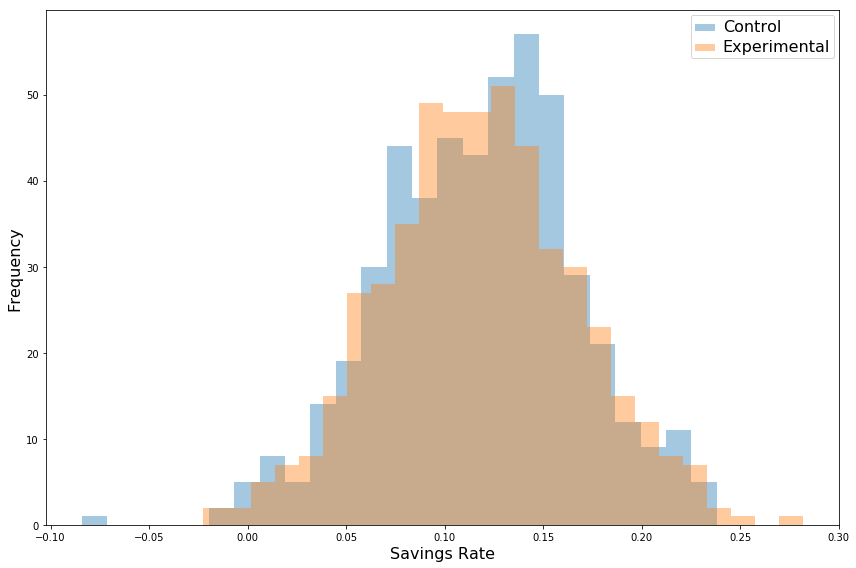

In [174]:
# Plot histogram of savings rates for 1 sample

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(group_1, kde=False, bins=25, label='Control');
sns.distplot(group_2, kde=False, bins=25, label='Experimental');

ax.set_xlabel("Savings Rate",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=16)
plt.tight_layout()

plt.savefig(fname='hist_1', dpi=150)
plt.show()

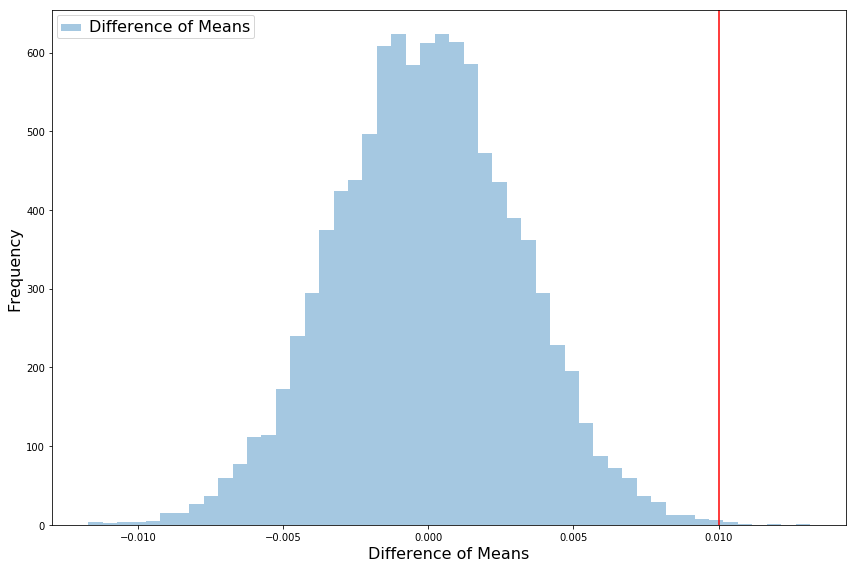

In [175]:
# Plot histogram of results for all 10,000 experiments

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(mean_diff, kde=False, bins=50, label='Difference of Means');

ax.set_xlabel("Difference of Means",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(x=0.01, c='red')
plt.legend()
plt.setp(ax.get_legend().get_texts(), fontsize=16)
plt.tight_layout()

plt.savefig(fname='hist_2', dpi=150)
plt.show()

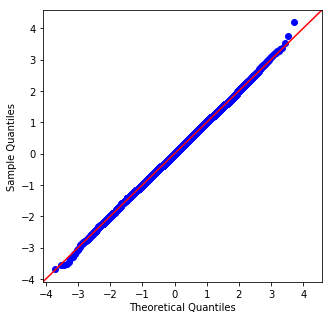

In [176]:
# Q-Q plot to check for normal distribution

fig_qq, ax_qq = plt.subplots(figsize=(5,5))
sm.qqplot(np.array(mean_diff), fit=True, line='45', ax=ax_qq);
plt.savefig(fname='qq_plot', dpi=150)

In [177]:
print('Number of obs. >= experimental result: ' + str(sum([1 for i in mean_diff if i >= 0.01])))
print('Percentage of obs. >= experimental result: ' + str(sum([1 for i in mean_diff if i >= 0.01])/sims))

Number of obs. >= experimental result: 9
Percentage of obs. >= experimental result: 0.0009


In [178]:
print('Stdev of mean diff from experiment: ' + str(round(np.var(mean_diff)**0.5, 5)))

Stdev of mean diff from experiment: 0.00315


In [179]:
print('Stdev of mean diff analytical: ' + str(round((np.var(group_1)/len(group_1) + np.var(group_2)/len(group_2))**0.5, 5)))

Stdev of mean diff analytical: 0.00312


In [180]:
print('Standard Error: ' + str((2*0.0025/500)**0.5))

Standard Error: 0.0031622776601683794


In [181]:
print('Test Statistic: ' + str((0.01 - 0)/(2*0.0025/500)**0.5))

Test Statistic: 3.1622776601683795


In [182]:
from scipy.stats import norm

# Two Tailed Test
print('The p-value is: ' + str(round((1 - norm.cdf(3.16))*2,4)))

The p-value is: 0.0016
